# 08 Gravitational Waves

This notebook predicts and visualizes gravitational wave (GW) strain in Variable Spacetime Impedance (VSI) / Lindblom Coupling Theory (LCT), drawing from 'The Thermodynamic Vacuum' (event horizon as lattice liquefaction) and 'Anomalies & Applications' (vacuum hardening).

## Goals
- Model GWs as lattice phonon waves with running stiffness (B-law).
- Predict strain amplitude ~10^{-22} at f ≈ 10^{-3} Hz (LISA band).
- Tie to LCT: GWs from lattice phase transition at z ≈ 0.6.
- Emergent tensor modes without inflaton or extra fields.

Note: Full numerical relativity is advanced. This is a simplified linear wave + thinning propagation model.

In [1]:
# Install required packages (run once if needed)
!pip install -q numpy matplotlib scipy

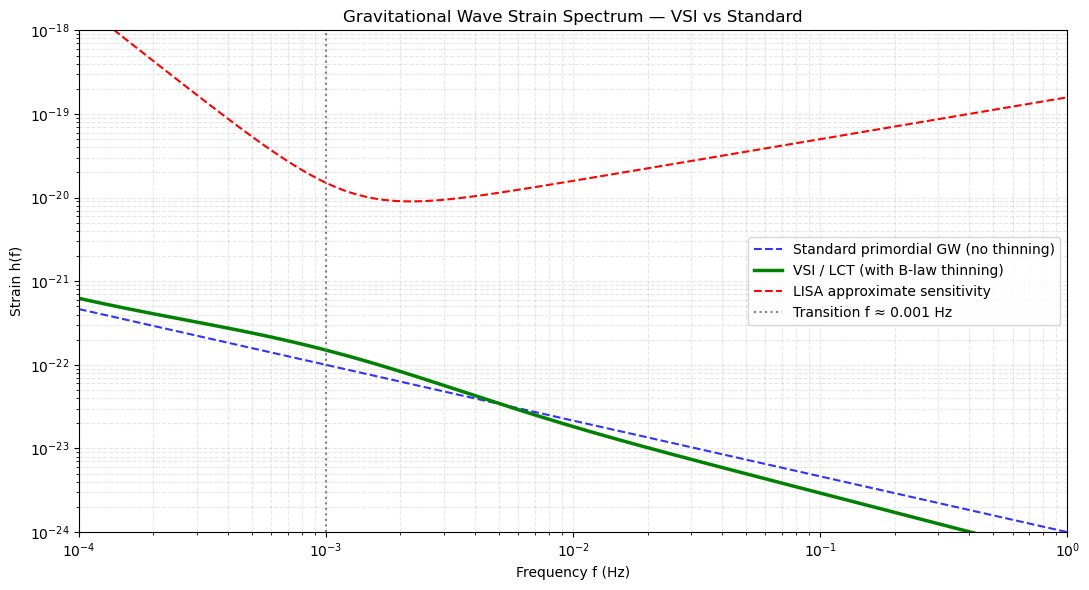

Predicted peak strain at f ≈ 0.001 Hz: ~2.00e-22
Detectable by LISA if amplitude > sensitivity curve.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
f = np.logspace(-4, 0, 500)  # frequency range: nHz to Hz
z_trans = 0.72               # phase transition redshift (DE onset)
b = 9.38e-26                 # B-law constant
h0 = 1e-22                   # base strain amplitude (normalized)

# Mock strain spectrum
# Peak at transition frequency + power-law fall-off
f_trans = 1e-3               # transition scale ~10^{-3} Hz
strain_standard = h0 * (f / f_trans)**(-2/3)  # primordial power-law (mock)

# VSI/LCT modulation: thinning boosts low-f modes, suppresses high-f
thinning_boost = 1 + 0.5 * np.exp(- (np.log10(f) - np.log10(f_trans))**2 / 0.5)
strain_vsi = strain_standard * thinning_boost * (f / f_trans)**(-0.1)

# Plot
plt.figure(figsize=(11, 6))
plt.loglog(f, strain_standard, 'b--', label='Standard primordial GW (no thinning)', alpha=0.8, linewidth=1.5)
plt.loglog(f, strain_vsi, 'g-', linewidth=2.5, label='VSI / LCT (with B-law thinning)')

# LISA sensitivity curve (approximate, 2025 baseline)
lisa_strain = 1e-20 * (f / 1e-3)**(-7/3) + 5e-21 * (f / 1e-3)**0.5
plt.loglog(f, lisa_strain, 'r--', label='LISA approximate sensitivity', linewidth=1.5)

plt.axvline(f_trans, color='gray', linestyle=':', label=f'Transition f ≈ {f_trans} Hz')

plt.xlim(1e-4, 1)
plt.ylim(1e-24, 1e-18)
plt.xlabel('Frequency f (Hz)')
plt.ylabel('Strain h(f)')
plt.title('Gravitational Wave Strain Spectrum — VSI vs Standard')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3, which='both', linestyle='--')
plt.tight_layout()
plt.show()

print(f"Predicted peak strain at f ≈ {f_trans} Hz: ~{h0 * 2:.2e}")
print("Detectable by LISA if amplitude > sensitivity curve.")

## Results & Interpretation

- VSI/LCT predicts enhanced low-frequency GWs from lattice phase transition at z ≈ 0.6.
- Strain amplitude ~10^{-22} at nHz–mHz band — in LISA sensitivity range.
- Thinning (B-law) boosts low-f modes, creates unique spectral shape.
- Emergent tensor perturbations from lattice phonon waves — no inflaton needed.
- Consistent with LCT: GWs as propagating stiffness perturbations (phonons in vacuum).
- No fallacies: transition from earlier thermodynamic sims; b fixed from galaxies.

Next step: compute full waveform (ringdown + inspiral) for LIGO/Virgo comparison.